# Selenium 

Selenium 是一个 Web 测试工具，可以模拟真实用户操作。因此，Selenium 也可以做数据采集工具。 它使用浏览器提供的自动化测试 API 控制浏览器自动加载页面，这样就可以获得异步加载的网页数据。


## Installment

用 conda 安装 selenium 

In [ ]:
!conda install selenium

Selenium 本身没有浏览器，他需要浏览器提供的 API，可以通过 help 函数查看支持哪些浏览器

In [2]:
from selenium import webdriver
import time
help(webdriver)

Help on package selenium.webdriver in selenium:

NAME
    selenium.webdriver

DESCRIPTION
    # Licensed to the Software Freedom Conservancy (SFC) under one
    # or more contributor license agreements.  See the NOTICE file
    # distributed with this work for additional information
    # regarding copyright ownership.  The SFC licenses this file
    # to you under the Apache License, Version 2.0 (the
    # "License"); you may not use this file except in compliance
    # with the License.  You may obtain a copy of the License at
    #
    #   http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing,
    # software distributed under the License is distributed on an
    # "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
    # KIND, either express or implied.  See the License for the
    # specific language governing permissions and limitations
    # under the License.

PACKAGE CONTENTS
    android (package)
    blackberry (pac

以 Chrome 为例，到 [官网](http://chromedriver.chromium.org/) 处下载 driver

下载完之后 Mac 用户将 ChromeDriver 复制到 Path 里

In [ ]:
!sudo mv ~/Downloads/chromedriver /usr/local/bin

测试下 selenium.webdriver() 能否测试 Chrome 浏览器

In [3]:
driver = webdriver.Chrome()
driver.get('http://www.google.com/')
time.sleep(5) # Let the user actually see something!
search_box = driver.find_element_by_name('q')
search_box.send_keys('ChromeDriver')
search_box.submit()
time.sleep(5) # Let the user actually see something!

WebDriverException: Message: chrome not reachable
  (Session info: chrome=79.0.3945.88)


## 模拟登陆

selenium 可以完全模拟用户在浏览器上的所有操作，包括输入框的内容填写、单击、截屏、下滑等各种操作。以登陆今日悉尼为例
`find_element_by_id()` 和 `find_element_by_classname()`用于获取元素位置，

模拟打开今日悉尼：
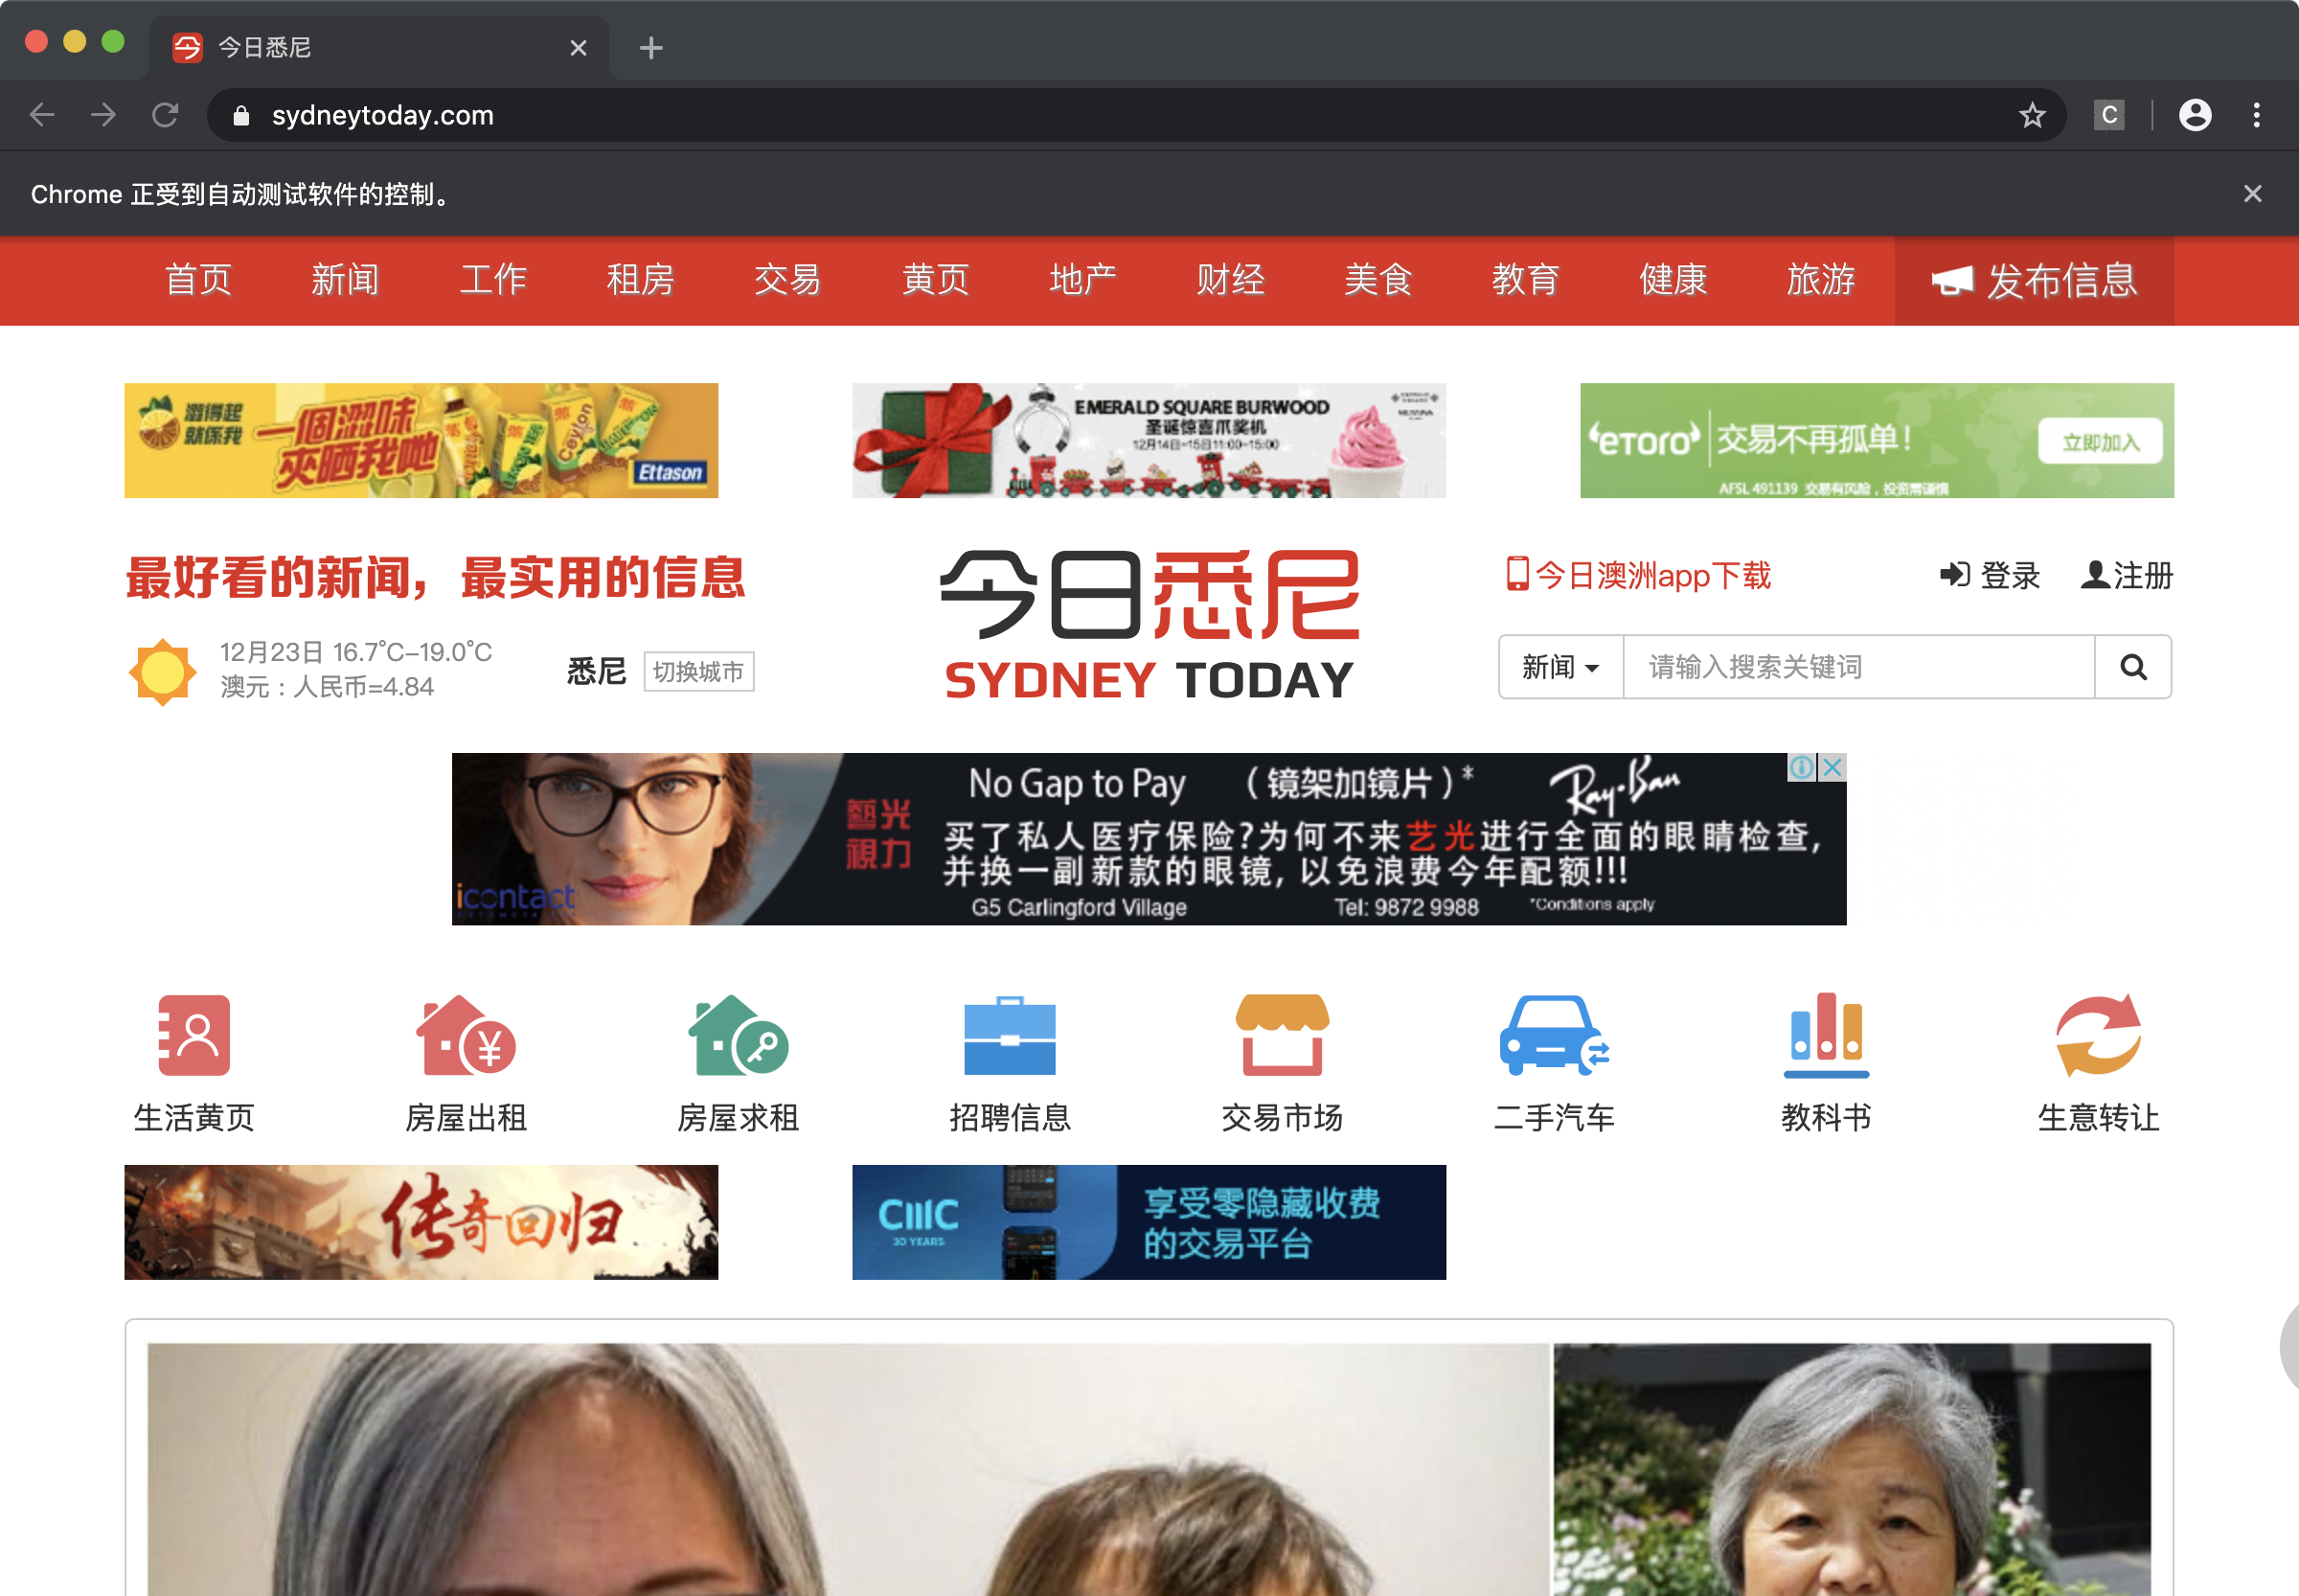

In [11]:
driver = webdriver.Chrome()
driver.get('https://www.sydneytoday.com/')
driver.implicitly_wait(10)


检查工具检查登录 button 的 class 名字，模拟点击

In [7]:
driver.find_element_by_class_name('icon-sign-in').click()

在打开的登录页面中，用检查工具检查要填的文本框 webElement, 还有要点击的登录 button

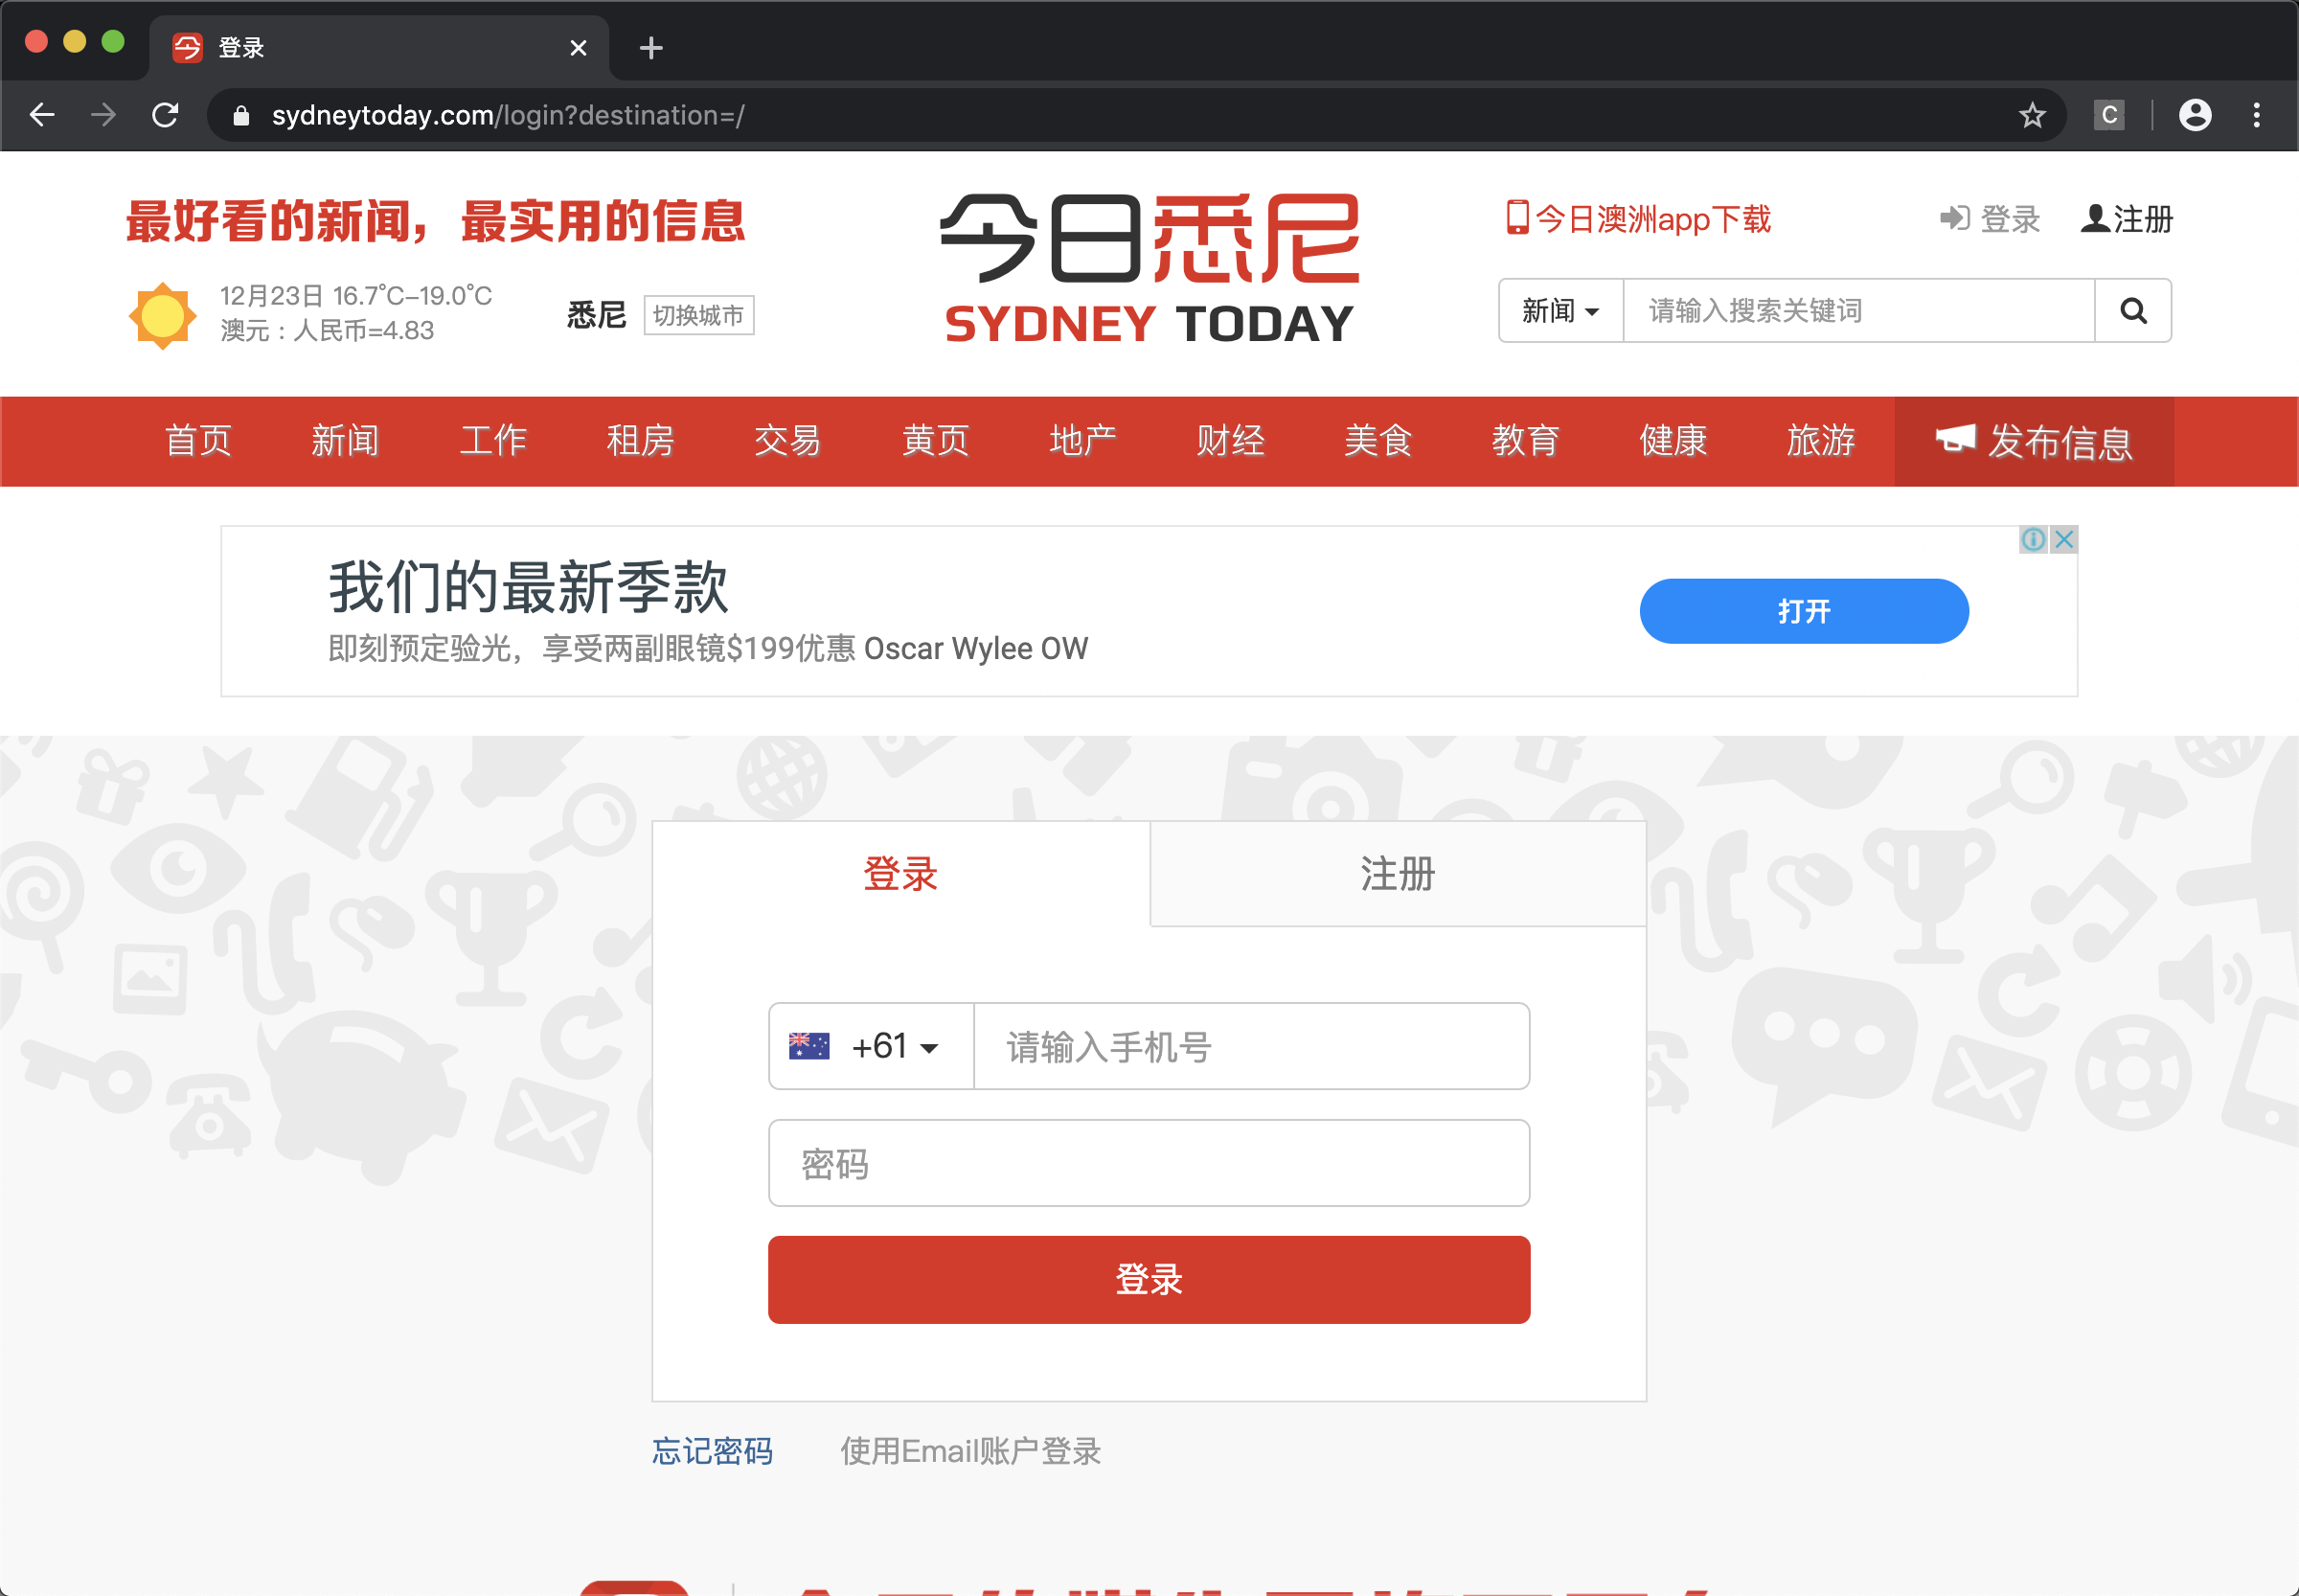

模拟发送文本框，和点击按钮。

打印返回的网页html源码

In [10]:
driver.find_element_by_id('tel').clear()
driver.find_element_by_id('tel').send_keys('0451937366')
driver.find_element_by_id('password').clear()
driver.find_element_by_id('password').send_keys('Zhangsiwen520')
driver.find_element_by_id('user-login').click()
print(driver.page_source)

<html lang="zh-CN"><head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge"><script type="text/javascript" src="https://bam.nr-data.net/1/e65ed14e85?a=341788662&amp;v=1158.afc605b&amp;to=YAADZkpUD0BQV0JcXllKIFFMXA5dHnNaWlNWCRIdVFoGWl8%3D&amp;rst=3621&amp;ref=https://www.sydneytoday.com/login&amp;ap=89&amp;be=494&amp;fe=3606&amp;dc=651&amp;perf=%7B%22timing%22:%7B%22of%22:1577057453513,%22n%22:0,%22u%22:463,%22ue%22:465,%22f%22:3,%22dn%22:3,%22dne%22:3,%22c%22:3,%22ce%22:3,%22rq%22:6,%22rp%22:456,%22rpe%22:629,%22dl%22:481,%22di%22:650,%22ds%22:650,%22de%22:656,%22dc%22:3606,%22l%22:3606,%22le%22:3616%7D,%22navigation%22:%7B%7D%7D&amp;fp=536&amp;fcp=536&amp;at=TEcAEAJOHE4%3D&amp;jsonp=NREUM.setToken"></script><script src="https://js-agent.newrelic.com/nr-1158.min.js"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script async="" src="https://www.google-

定位获取元素信息的函数有这些

find_element_by_id

find_element_by_name

find_element_by_class_name

find_element_by_link_text

find_element_by_tag_name

find_element_by_css_selector

find_element_by_partial_link_text

find_element_by_xpath

试着爬一下异步加载的租房信息页 https://www.sydneytoday.com/house_rent

In [ ]:
import pymongo
import re

client = pymongo.MongoClient('localhost',27017)
mydb = client['mydb']
today_syd = mydb['today_syd']


In [145]:
driver = webdriver.Chrome()
driver.get('https://www.sydneytoday.com/house_rent')
driver.implicitly_wait(10)

例如爬取 Burwood 地区的租房信息，可以用检查器检查element对应 Xpath, 然后调用 click()

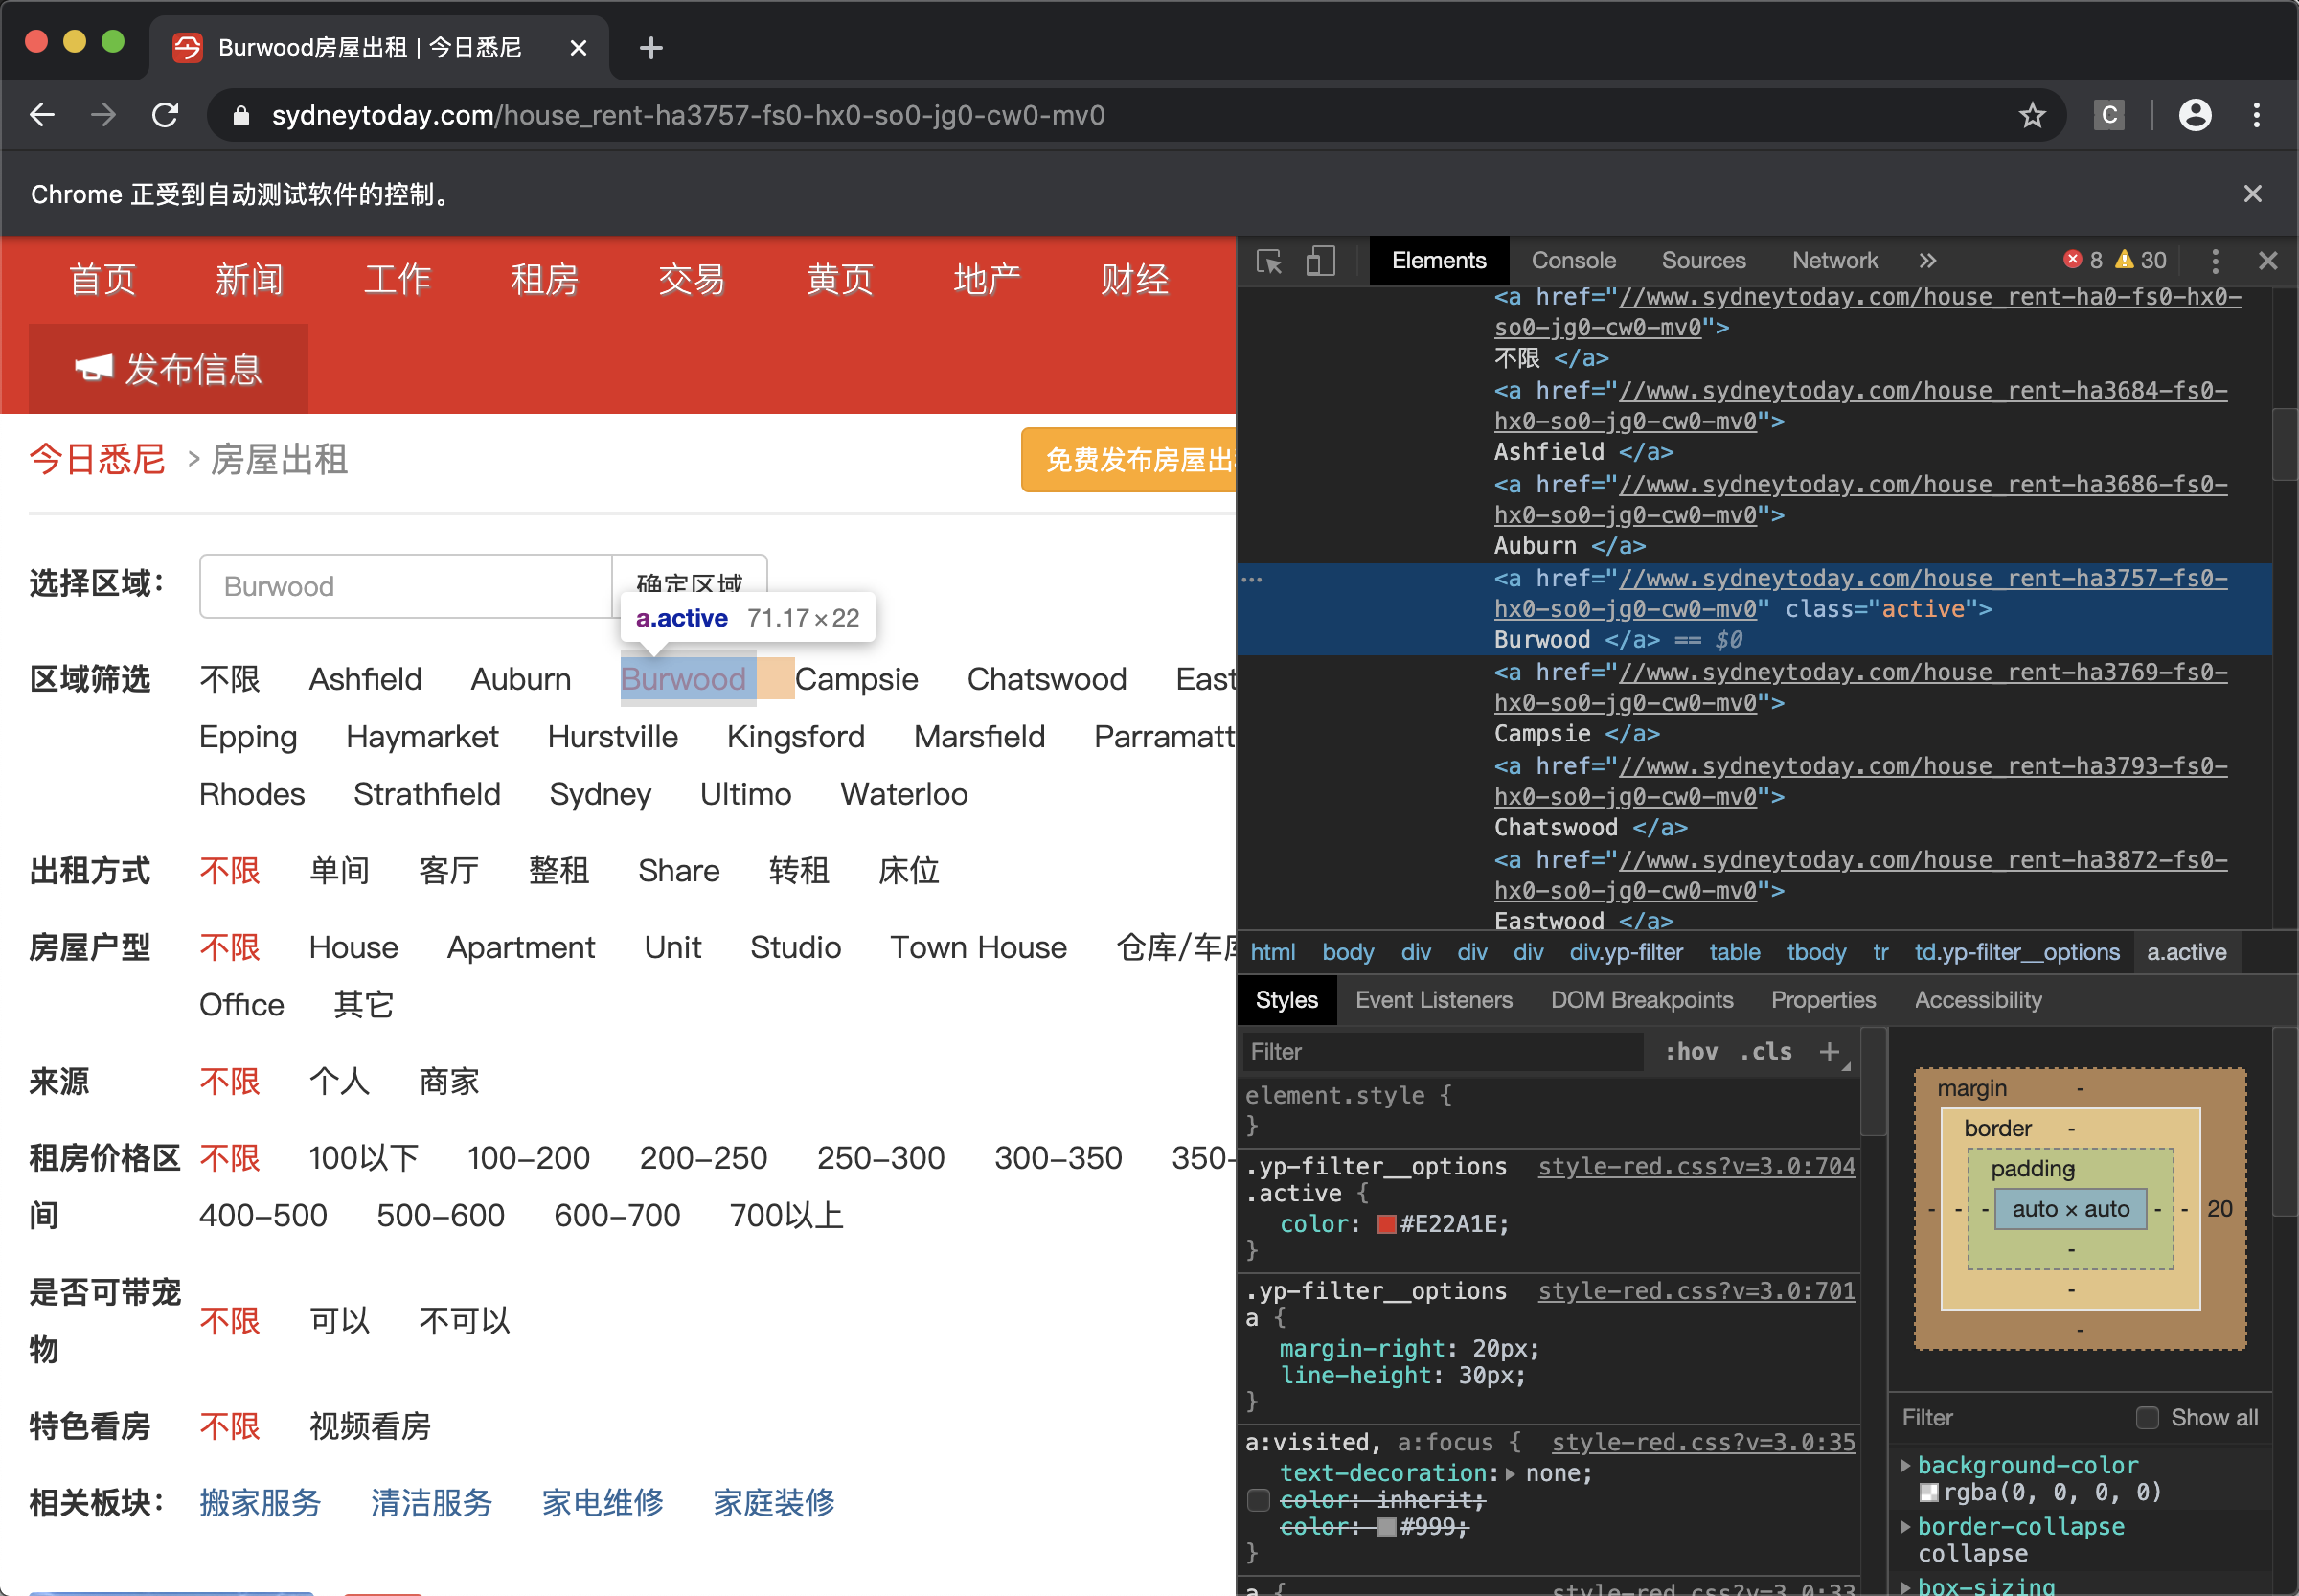

In [146]:
# 点击 burwood 
driver.find_element_by_xpath('/html/body/div[4]/div/div[1]/div[3]/table/tbody/tr[2]/td[2]/a[4]').click()

In [147]:
for element in driver.find_elements_by_class_name('yp-list-title'):
    get_info(element)
    print(0)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


切换到新的标签页
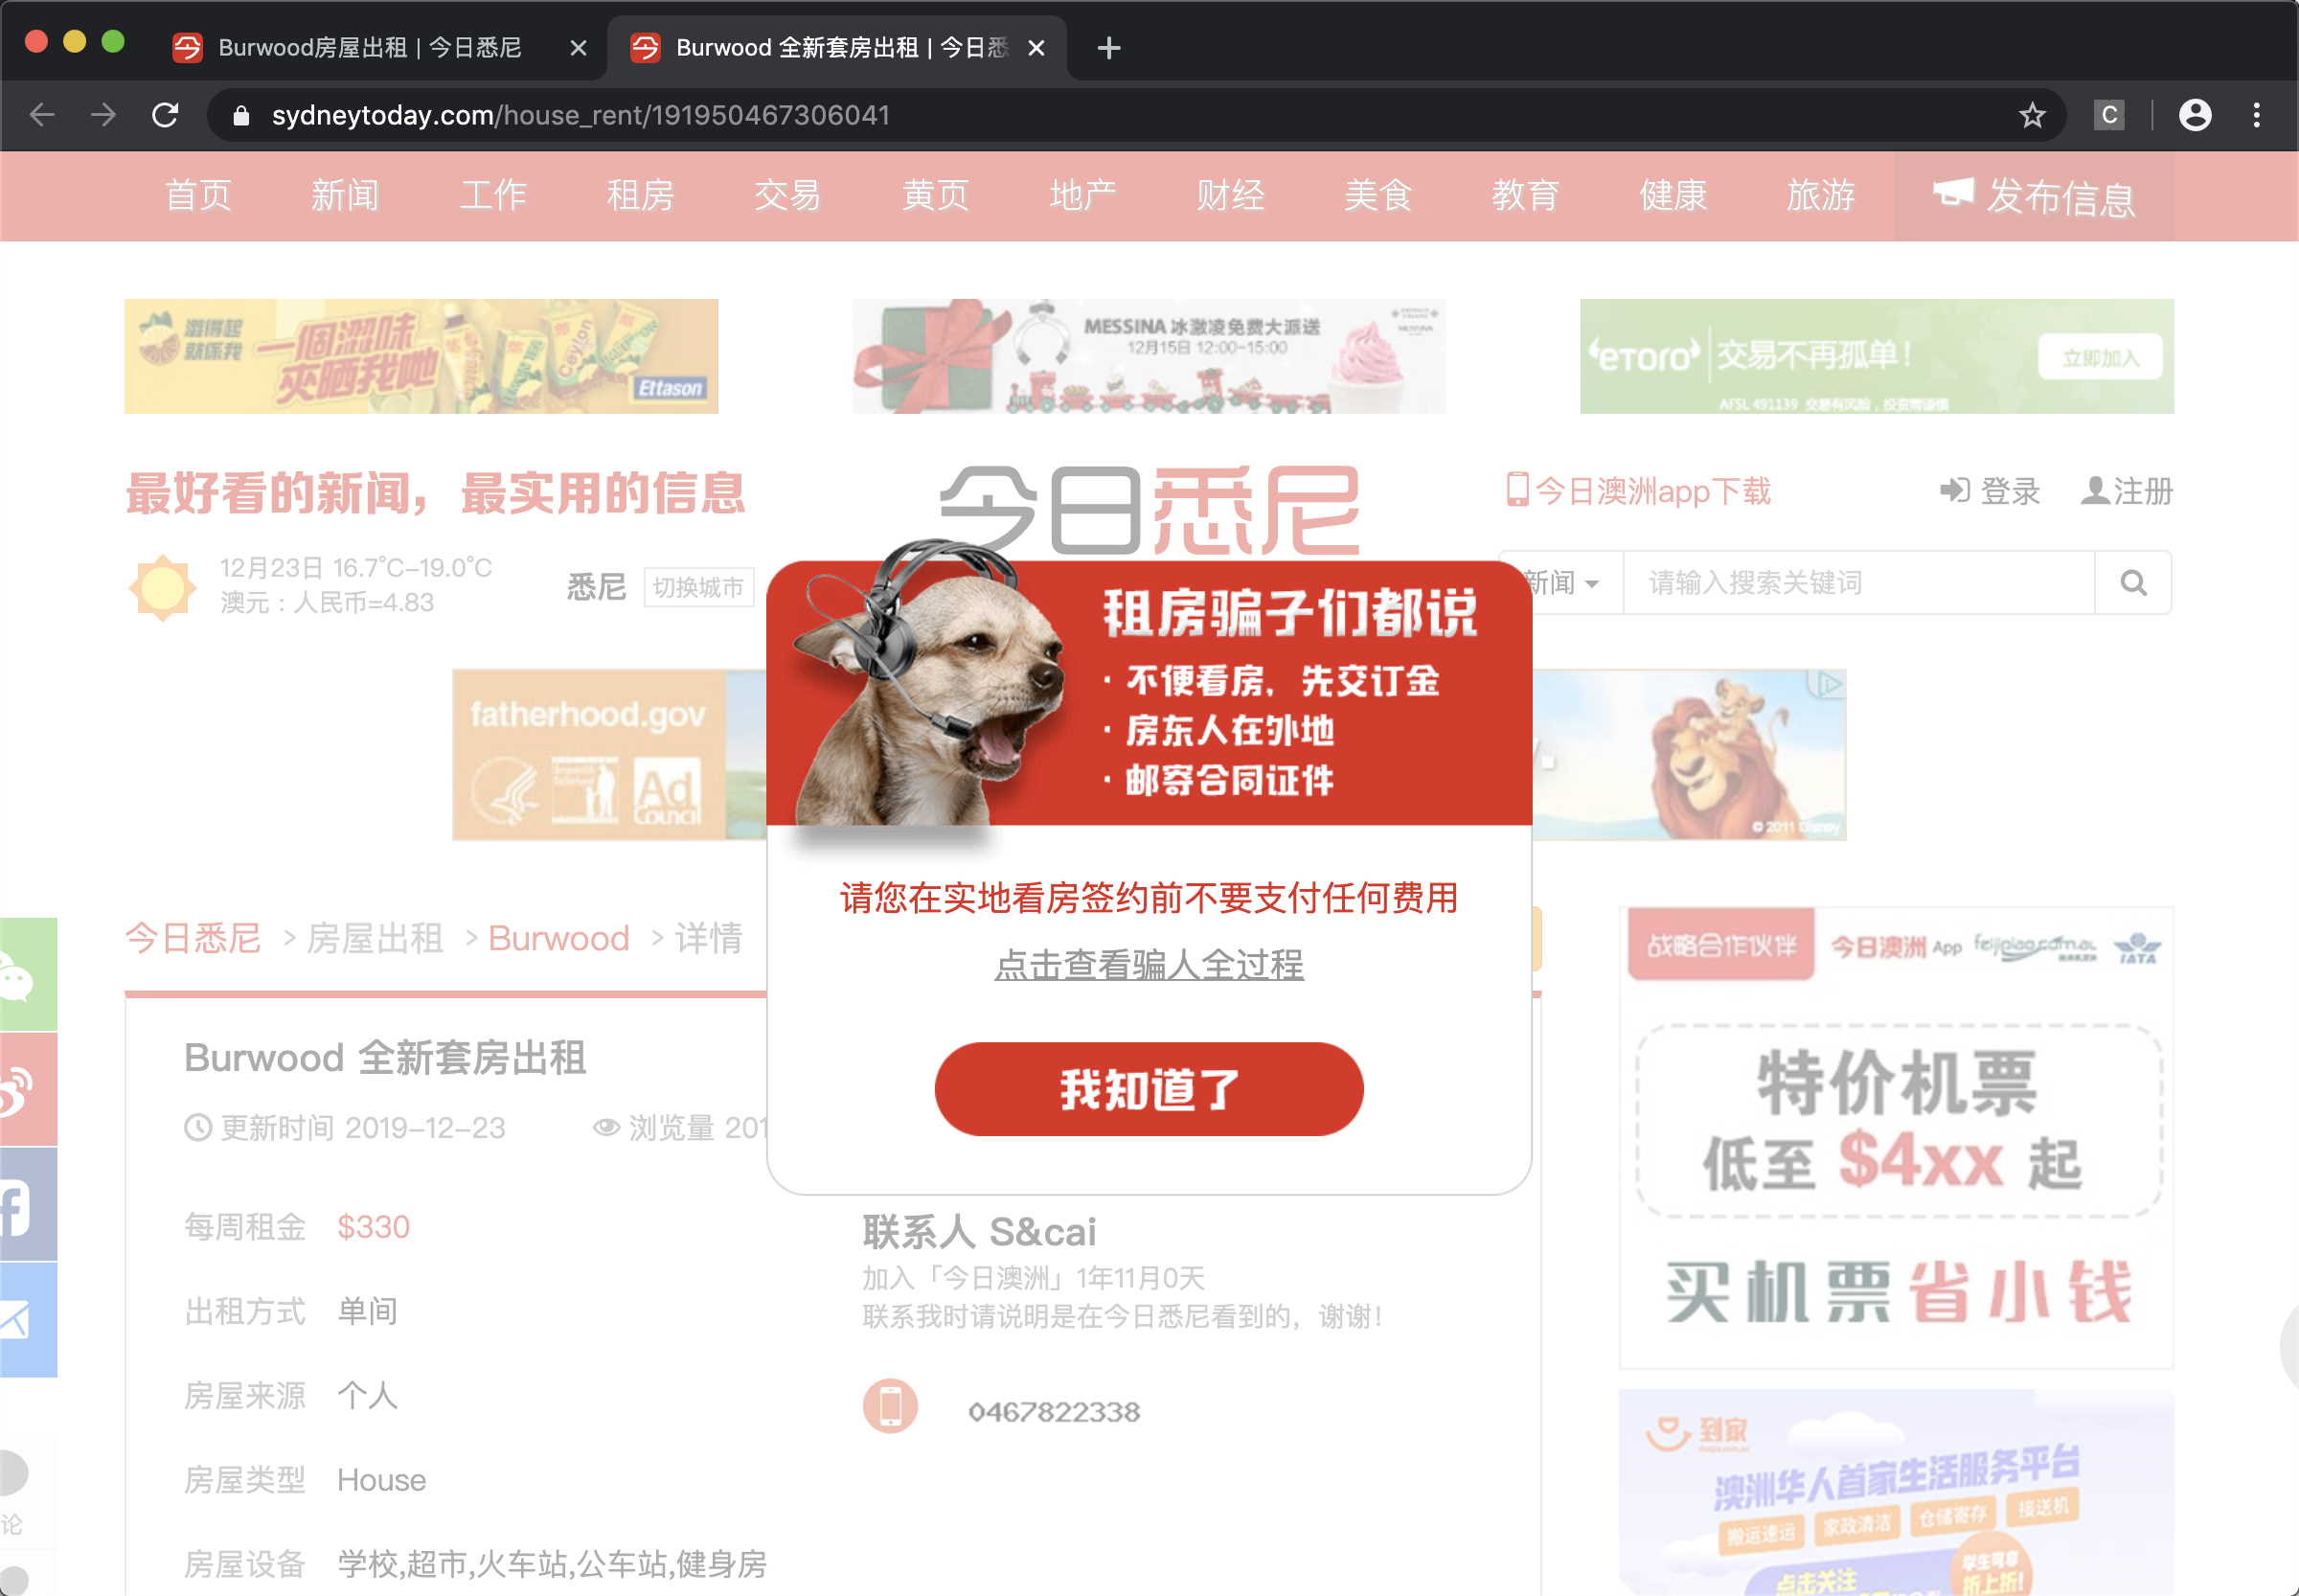


In [144]:
def get_info(element):
    element.click()
    handles = driver.window_handles
    driver.switch_to.window(handles[1]) 
    try:
        driver.find_element_by_xpath('/html/body/div[5]/div/div/div/div/img').click() # 点击“我知道了”图片
    except: pass
    
    title = driver.find_element_by_xpath('/html/body/div[4]/div/div[1]/div[2]/div[1]/h1').text
    update_time = re.findall(r'\d{4}-\d{2}-\d{2}',driver.find_element_by_xpath('/html/body/div[4]/div/div[1]/div[2]/div[1]/div[1]/span[1]').text)[0]
    price = driver.find_element_by_xpath('/html/body/div[4]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[1]/span[2]').text
    style = driver.find_element_by_xpath('/html/body/div[4]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[2]').text[4:]
    source = driver.find_element_by_xpath('/html/body/div[4]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[3]').text[4:]
    house_type = driver.find_element_by_xpath('/html/body/div[4]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[4]').text[4:]
    devices = driver.find_element_by_xpath('/html/body/div[4]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[5]').text[4:]
    description = driver.find_element_by_xpath('/html/body/div[4]/div/div[1]/div[2]/div[1]/div[4]').text

    info = { 'title': title,
            'update_time': update_time,
            'price': price,
            'style': style,
            'source': source,
            'house_type': house_type,
            'devices': devices,
            'description': description,
    }

    today_syd.insert_one(info)
    
    # 切换回原来的标签页
    driver.close()
    driver.switch_to.window(handles[0])

In [111]:
# from selenium.webdriver.common.action_chains import ActionChains
# actions = ActionChains(driver)
# actions.move_by_offset(10,10).click().perform()


In [149]:
driver.implicitly_wait(1)  # 设置超时时间为1秒
# selenium测瀑布流UI页面的Python代码
while True:
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    try:
        i = 1
        while True:
            js = "var q=document.documentElement.scrollTop=" + str(1400*i)  # 谷歌 和 火狐
            i = i+1
            driver.execute_script(js)
            time.sleep(1)

    except NoSuchElementException as e:
        # 抛出异常说明没找到底部标志，继续向下滑动
        print('erro %s'% e)

NameError: name 'NoSuchElementException' is not defined